# Einleitung zum Versuch "Aggregation and Performance Metrics"

Mit diesem Versuchspaket erhaltet ihr ein umfassendes Verst√§ndnis f√ºr die Vorteile der Zeitaggregation und die Berechnung von Performance-Metriken in der atmosph√§rischen Messtechnik. Ihr lernt, wie ihr hochfrequente Sensordaten, die mit Rauschen behaftet sind, aggregiert, um klarere Trends und stabilere Signale zu erhalten, und wie ihr wichtige Kennzahlen wie den Mittelwert, den Mean Absolute Error (MAE) und den Root Mean Squared Error (RMSE) zur Bewertung der Signalqualit√§t einsetzt.

## Hintergrund und Motivation

Moderne Sensorsysteme liefern oftmals Daten mit hoher zeitlicher Aufl√∂sung (1-Minuten-Daten), die aufgrund zuf√§lliger Schwankungen und Rauschen schwer zu interpretieren sind. Durch die zeitliche Aggregation ‚Äì etwa zu st√ºndlichen Mittelwerten ‚Äì wird das Rauschen reduziert und der zugrunde liegende Trend wird besser sichtbar. 

Dar√ºber versuchen wir die Performance zweier $CO_2$ Sensoren (Vaisala GMP343) gegen√ºber eines teuren $CO_2$ Referenz Sensors (Picarro G2401) zu verstehen. Hierf√ºr nutzen wir unterschiedliche Berechnungen: Mittelwert, den MAE (Mean Absolute Error), und den RMSE (Root Mean Squared Error).

Diese Kennzahlen helfen, die Qualit√§t und Genauigkeit des aggregierten Signals zu bewerten und unterschiedliche Messsysteme miteinander zu vergleichen.

In [1]:
import polars as pl
import os
import sys
import numpy as np
import polars.selectors as cs

# Add the parent directory to the system path
PROJECT_PATH = os.path.abspath(os.path.join(".."))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from utils.plot_dataframes import plot_columns, plot_column_difference

In [2]:
df_s_3 = pl.read_parquet("../data/2_Aggregation_And_Performance_Metrics/Sensor_3_GMP343_Measurement.parquet") 
df_s_6 = pl.read_parquet("../data/2_Aggregation_And_Performance_Metrics/Sensor_6_GMP343_Measurement.parquet")

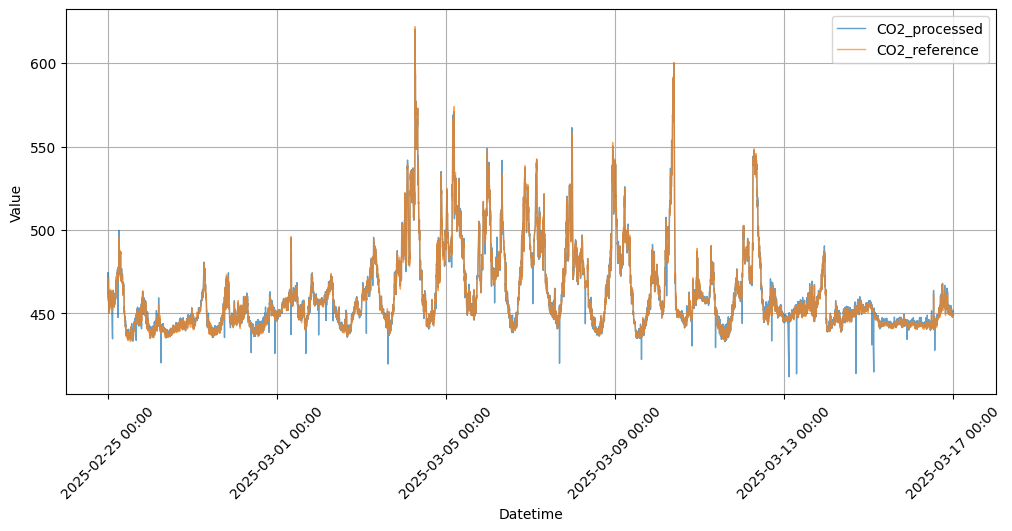

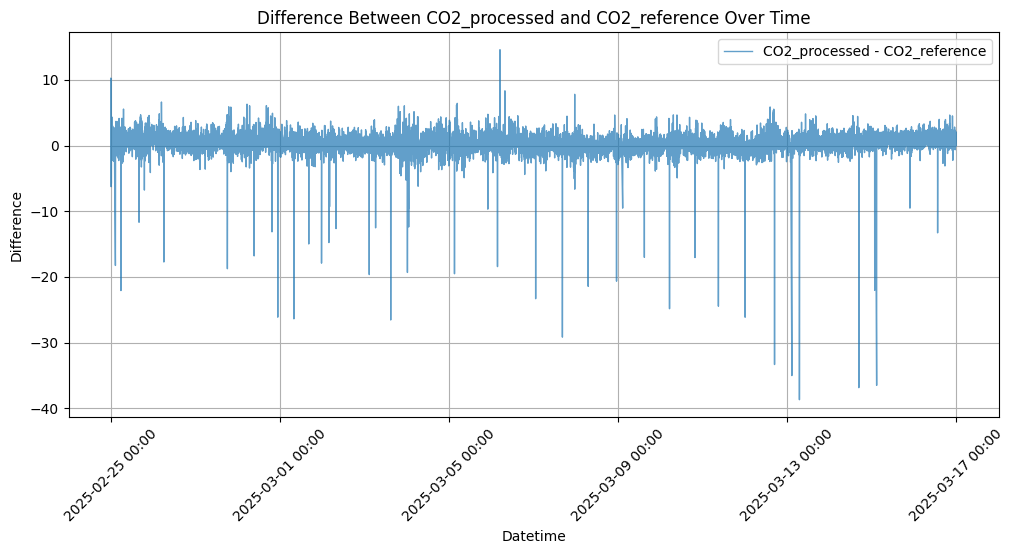

In [3]:
plot_columns(df_s_3, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_3, "datetime", ["CO2_processed", "CO2_reference"])

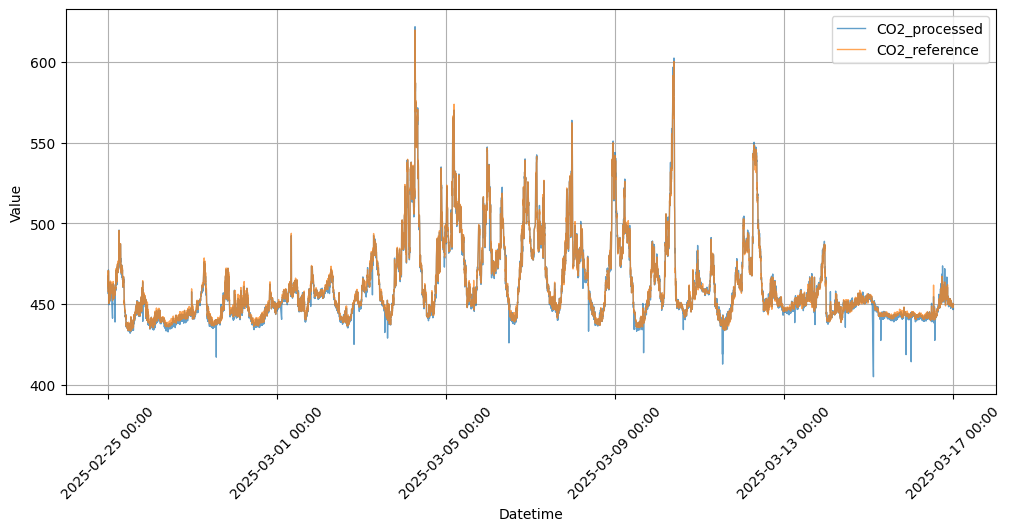

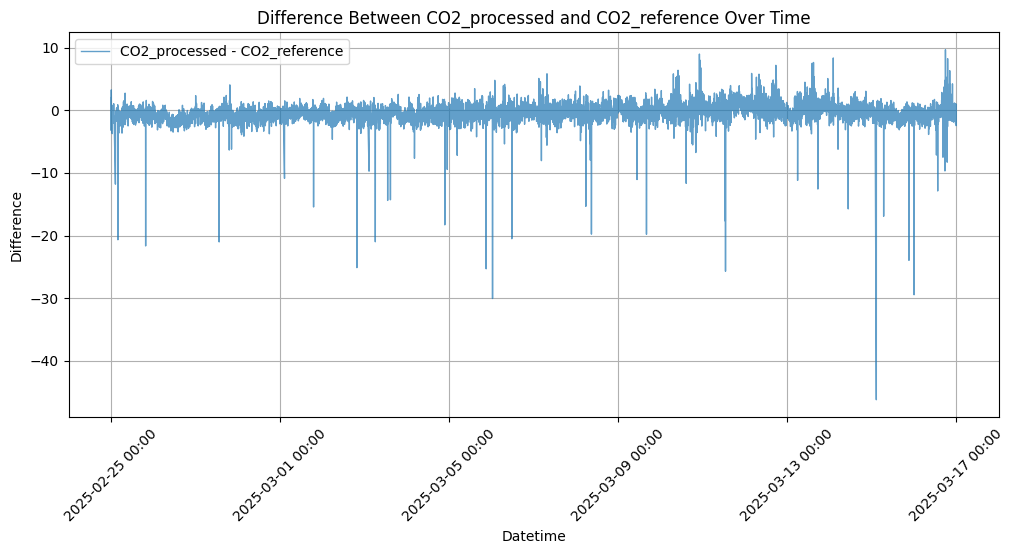

In [4]:
plot_columns(df_s_6, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_6, "datetime", ["CO2_processed", "CO2_reference"])

# Versuch: Berechnung von Mean, MAE und RMSE

In diesem Versuch analysieren wir Zeitreihen von Sensordaten und zugeh√∂rigen Referenzdaten. Ziel ist es, verschiedene Performance-Metriken zu implementieren und zu berechnen, die uns helfen, die Genauigkeit und Qualit√§t der Sensorsignale zu bewerten.

## Hintergrund und Motivation

Sensordaten k√∂nnen von Rauschen, Ausrei√üern und systematischen Abweichungen beeinflusst werden. Um die Leistung eines Sensorsystems zu beurteilen, vergleichen wir die gemessenen Daten mit Referenzwerten. Dabei sind folgende Metriken von besonderem Interesse:

- **Mean (Mittelwert):**  
  Der Durchschnittswert der Daten, der einen allgemeinen √úberblick √ºber die Lage der Messwerte gibt.

  $$
  \text{Mean} = \frac{1}{n} \sum_{i=1}^{n} y_i
  $$

- **Mean Absolute Error (MAE):**  
  Der durchschnittliche absolute Fehler zwischen den Sensordaten und den Referenzdaten. Er zeigt, wie stark die Messwerte im Durchschnitt von den tats√§chlichen Werten abweichen.

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
  $$

- **Root Mean Squared Error (RMSE):**  
  Die Quadratwurzel des durchschnittlichen quadrierten Fehlers. Da hier gr√∂√üere Abweichungen st√§rker gewichtet werden, reagiert der RMSE empfindlicher auf Ausrei√üer.

  $$
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}
  $$

Diese Metriken liefern unterschiedliche Perspektiven auf die Datenqualit√§t: W√§hrend der Mittelwert den zentralen Tendenzwert beschreibt, zeigen MAE und RMSE, wie gut (oder schlecht) die Sensordaten mit den Referenzwerten √ºbereinstimmen. Insbesondere der RMSE hebt gr√∂√üere Fehler hervor, was bei der Identifikation von Ausrei√üern und systematischen Abweichungen hilfreich sein kann.

## Ziel des Versuchs

- **Implementierung der Performance-Metriken:**  
  Entwickelt Python-Funktionen zur Berechnung von Mean, MAE und RMSE.
  
- **Vergleich der Metriken:**  
  Analysiert, wie sich die Metriken untereinander unterscheiden und welche Aussagekraft sie hinsichtlich der Sensorleistung haben.
  
- **Bewertung der Sensordaten:**  
  Wendet die Funktionen auf gegebene Zeitreihen von Sensordaten und Referenzdaten an, um die Genauigkeit des Sensors zu beurteilen und m√∂gliche Kalibrierungsans√§tze zu diskutieren.

# Hilreiche Funktionen

[Numpy Documentation](https://numpy.org/doc/2.1/reference/routines.math.html)


import numpy as np 

- np.mean([1, 2, 3, 4, 5]) -> np.float64(3.0)

- np.abs([-1, -2, -3, -4, -5]) -> array([1, 2, 3, 4, 5])

- np.sqrt([1, 4, 9, 16, 25]) -> array([1., 2., 3., 4., 5.])

- np.array([1, 2, 3, 4, 5]) ** 2 -> array([ 1,  4,  9, 16, 25])


# üß™ Praktische √úbung 1

‚úÖ Aufgaben:

1. **Implementierung der Metriken:**  
   Schreibt Python-Funktionen f√ºr Mean, MAE und RMSE

2. **Anwendung und Vergleich:**  
   Wendet die implementierten Funktionen auf die Zeitreihen an und vergleicht die Ergebnisse. Diskutiert, welche Metrik sich st√§rker an Ausrei√üern orientiert und welche Metrik als allgemeiner Indikator f√ºr die Messgenauigkeit dient.

In [5]:
def mean(values: np.ndarray) -> float:
    """
    Berechnet den Mittelwert der gegebenen Werte.
    """
    # Implementierung des Mittelwerts
    
    return mean

def mae(sensor: np.ndarray, reference: np.ndarray) -> float:
    """
    Berechnet den Mean Absolute Error (MAE) zwischen den Sensor- und Referenzdaten.
    """
    # Implementierung des MAE
    
    return mae

def rmse(sensor: np.ndarray, reference: np.ndarray) -> float:
    """
    Berechnet den Root Mean Squared Error (RMSE) zwischen den Sensor- und Referenzdaten.
    """
    # Implementierung des RMSE
    
    return rmse

In [7]:
assert(mean(np.array([1, 2, 3])) == 2)
assert(mae(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0)
assert(rmse(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0)

In [6]:
# Sensordaten und Referenzdaten als numpy arrays
sensor_3_data = df_s_3.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_3.select(pl.col("CO2_reference")).to_numpy()

print("Mean (Sensor 3):", mean(sensor_3_data - reference_data))
print("MAE: (Sensor 3)", mae(sensor_3_data, reference_data))
print("RMSE: (Sensor 3)", rmse(sensor_3_data, reference_data))

sensor_6_data = df_s_6.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_6.select(pl.col("CO2_reference")).to_numpy()

print("Mean (Sensor 6):", mean(sensor_6_data - reference_data))
print("MAE: (Sensor 6)", mae(sensor_6_data, reference_data))
print("RMSE: (Sensor 6)", rmse(sensor_6_data, reference_data))

Mean (Sensor 3): 0.3518541885146903
MAE: (Sensor 3) 1.1044634964210875
RMSE: (Sensor 3) 1.8988939438316637
Mean (Sensor 6): -0.43237901764373793
MAE: (Sensor 6) 1.0759301930097382
RMSE: (Sensor 6) 1.8243936357323267


Fragen:

- Wieso unterscheiden sich die Werte?
- Was ist der treibende Faktor im Unterschied zwischen MAE und RMSE?

--- 

# Versuch: Anwendung des Hampel-Filters zur Ausrei√üerentfernung

In diesem Versuch erarbeiten wir, wie ein Hampel-Filter eingesetzt werden kann, um Ausrei√üer aus einem Sensorsignal zu entfernen. Ziel ist es, die Qualit√§t und Aussagekraft der Messdaten zu verbessern, bevor weitere Analysen (z.‚ÄØB. Zeitaggregation und Performance-Metriken) durchgef√ºhrt werden.

## Hintergrund

Sensordaten sind h√§ufig von zuf√§lligen St√∂rungen und Ausrei√üern betroffen, die durch Fehler in der Messung, vor√ºbergehende St√∂rungen oder andere Anomalien verursacht werden k√∂nnen. Solche Ausrei√üer k√∂nnen die statistische Analyse und die Berechnung von Kennzahlen erheblich verf√§lschen. 

Der **Hampel-Filter** ist ein robustes Verfahren zur Identifikation und Korrektur von Ausrei√üern in Zeitreihen. Er basiert auf dem Median und der Median Absolute Deviation (MAD) und bietet den Vorteil, dass er im Vergleich zu anderen Methoden (z.‚ÄØB. dem Z-Score) weniger anf√§llig f√ºr Verzerrungen durch extreme Werte ist.

## Ziel des Versuchs

- **Ausrei√üererkennung:**  
  Identifiziert einzelne Datenpunkte, die signifikant von den umgebenden Werten abweichen.

- **Signalbereinigung:**  
  Entfernt oder ersetzt diese Ausrei√üer, um ein glatteres, repr√§sentativeres Sensorsignal zu erhalten.

- **Vorbereitung f√ºr weitere Analysen:**  
  Ein sauberes Signal erm√∂glicht genauere Zeitaggregation und die Berechnung von Performance-Metriken (wie Mean, MAE, RMSE), die f√ºr die Bewertung der Sensorleistung wichtig sind.

# Mathematische Funktion des Hampel-Filters

Der Hampel-Filter ist ein robustes Verfahren zur Identifikation und Korrektur von Ausrei√üern in Zeitreihen. Im Folgenden wird die mathematische Funktionsweise des Filters erl√§utert.

## Vorgehensweise im Detail

Gegeben sei eine Zeitreihe

$$
x_1, x_2, \ldots, x_N.
$$

F√ºr jeden Datenpunkt $x_i$ wird in einem festgelegten Fenster (zum Beispiel von $i - k$ bis $i + k$) Folgendes berechnet:

1. **Median im Fenster:**  
   Definiert den Median der Werte im Fenster als

   $$
   m_i = \text{median}\{x_{i-k}, x_{i-k+1}, \ldots, x_{i+k}\}.
   $$

2. **Median Absolute Deviation (MAD):**  
   Berechnet die mittlere absolute Abweichung der Werte vom Median im selben Fenster:

   $$
   \text{MAD}_i = \text{median}\{|x_j - m_i| : j = i-k, \ldots, i+k\}.
   $$

3. **Ausrei√üererkennung:**  
   Ein Datenpunkt $x_i$ wird als Ausrei√üer klassifiziert, wenn die Abweichung vom Median einen vorgegebenen Schwellenwert √ºberschreitet. Konkret wird gepr√ºft, ob

   $$
   |x_i - m_i| > t \cdot \text{MAD}_i,
   $$

   wobei $t$ ein Schwellenfaktor (typischerweise z.‚ÄØB. 3) ist. F√ºr normalverteilte Daten kann der Faktor $t$ mit dem Multiplikator (etwa 1.4826) kombiniert werden, um die MAD in eine Sch√§tzung der Standardabweichung zu √ºberf√ºhren, falls dies erforderlich ist.

4. **Korrektur der Ausrei√üer:**  
   Ist die Bedingung erf√ºllt, wird $x_i$ als Ausrei√üer betrachtet und √ºblicherweise durch den Median $m_i$ des Fensters ersetzt. Andernfalls bleibt der Wert unver√§ndert.

## Zusammenfassung der Filterfunktion

Der Hampel-Filter transformiert den urspr√ºnglichen Signalwert $x_i$ zu einem gefilterten Wert $\hat{x}_i$ nach folgender Regel:

$$
\hat{x}_i = 
\begin{cases}
m_i, & \text{wenn } |x_i - m_i| > t \cdot \text{MAD}_i, \\
x_i, & \text{sonst}.
\end{cases}
$$

Diese Methode ist robust gegen√ºber Ausrei√üern, da der Median und die MAD wesentlich weniger empfindlich gegen√ºber extremen Werten sind als arithmetische Mittel und Standardabweichung.

# üß™ Praktische √úbung 2

In dieser √úbung wollen wir ein Gef√ºhl daf√ºr entwickeln wie der Input des Hampel Filters die Messreihe ver√§ndert. Hierf√ºr testen wir uns durch die Ver√§nderung der Eingabeparamter an eine geeignete Filterung heran.

‚úÖ Aufgabe:

- Ver√§ndert die Parameter `window_size` und `n_sigma`, sodass eine geeignete Korrektur der Messdaten erfolgt. 

## System 3

In [3]:
def hampel_filter(series, window_size=7, n_sigmas=3):
    rolling_median = series.rolling(window=window_size, center=True).median()
    mad = lambda x: np.median(np.abs(x - np.median(x)))
    rolling_mad = series.rolling(window=window_size, center=True).apply(mad, raw=True)
    threshold = n_sigmas * rolling_mad
    diff = np.abs(series - rolling_median)
    outlier_mask = diff > threshold

    filtered = series.copy()
    filtered[outlier_mask] = rolling_median[outlier_mask]  # Replace outliers

    return filtered, outlier_mask

Detektierte Ausrei√üer: 8.2780%


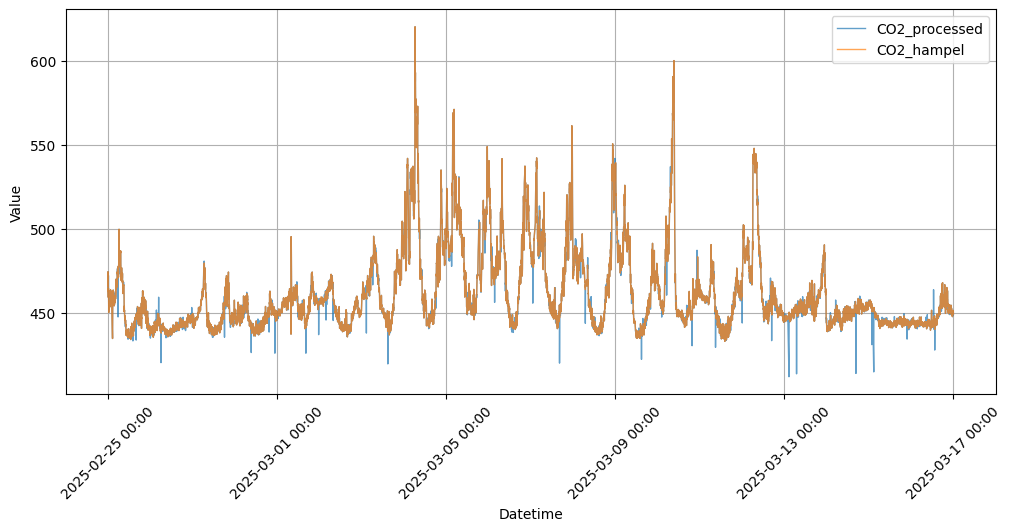

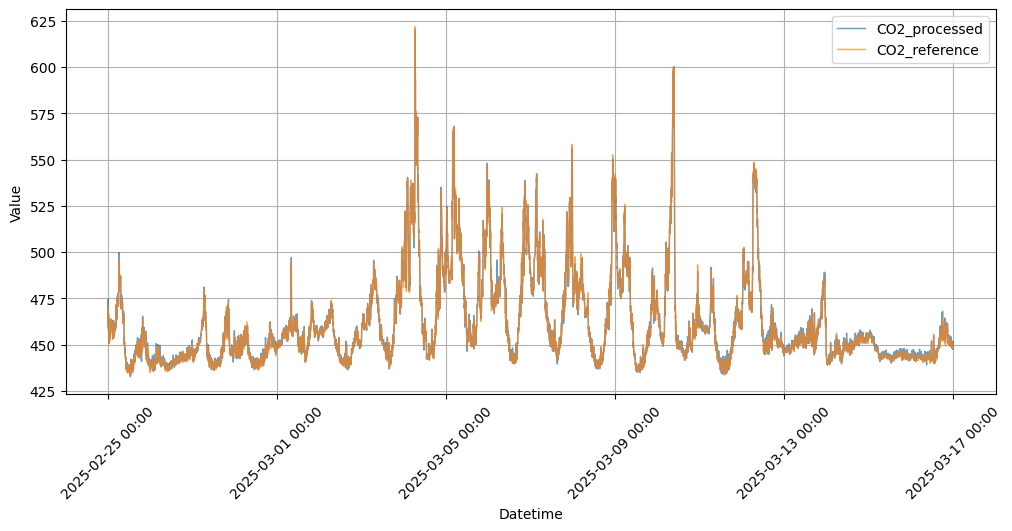

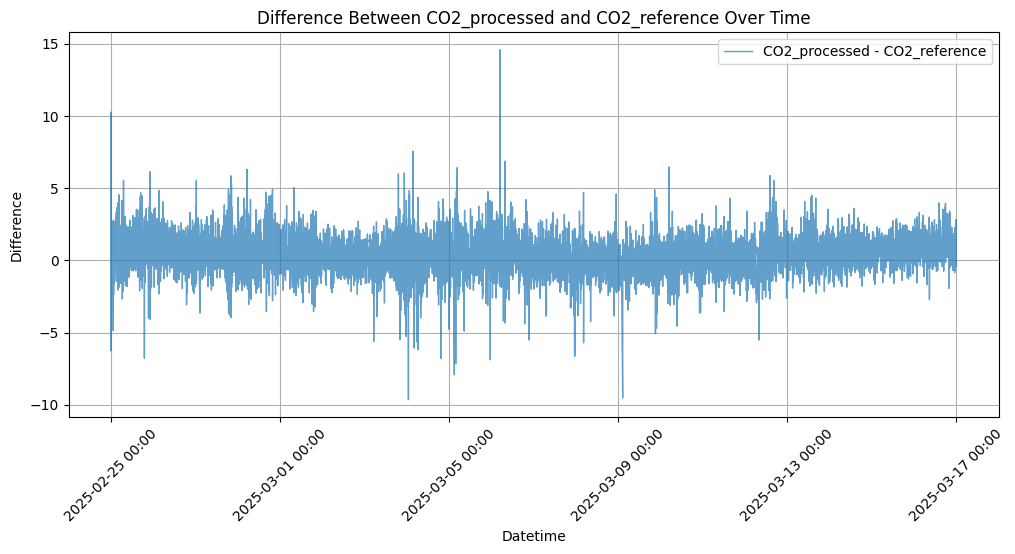

In [ ]:
## Ver√§ndere nachfolgende Parameter
window_size = 120
n_sigma = 3.0
##

# Convert to pandas for filtering
co2_series = df_s_3["CO2_processed"].to_pandas()

# Apply Hampel
filtered_series, outlier_mask = hampel_filter(co2_series)

# Print spike stats
print(f"Detektierte Ausrei√üer: {(outlier_mask.sum() / len(co2_series)) * 100:.4f}%")

# Add columns back to Polars
df_s_3 = df_s_3.with_columns([
    pl.Series("CO2_hampel", filtered_series).cast(pl.Float64),
    pl.Series("Outlier_Mask", outlier_mask).cast(pl.Boolean)
])

# Round and flag outliers
df_s_3 = df_s_3.with_columns([
    pl.col("CO2_processed").round(2),
    pl.col("CO2_hampel").round(2),
    pl.when(pl.col("CO2_processed").ne(pl.col("CO2_hampel")))
      .then(pl.lit('H'))
      .otherwise(pl.lit('U'))
      .alias("Flag")
])

# Filter outliers
df_s_3_filtered = df_s_3.filter(pl.col("Flag") == "U")

# Extract arrays
sensor_3_data = df_s_3_filtered.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_3_filtered.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 3):", mean(sensor_3_data - reference_data))
print("MAE: (Sensor 3)", mae(sensor_3_data, reference_data))
print("RMSE: (Sensor 3)", rmse(sensor_3_data, reference_data))
    
# Plot
plot_columns(df_s_3, "datetime", ["CO2_processed", "CO2_hampel"])
plot_columns(df_s_3_filtered, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_3_filtered, "datetime", ["CO2_processed", "CO2_reference"])

## System 6

Detektierte Ausrei√üer: 7.7440%


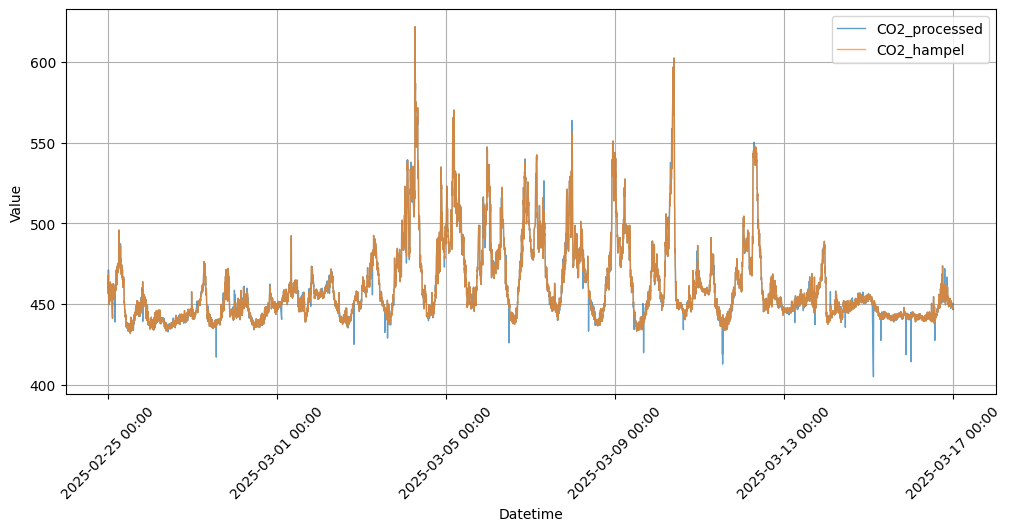

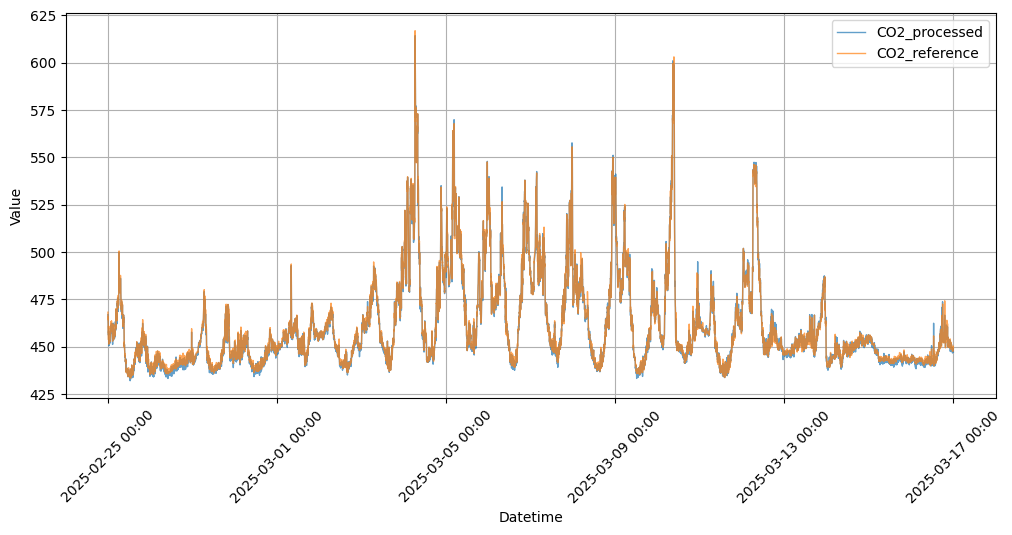

In [ ]:
## Ver√§ndere nachfolgende Parameter
window_size = 120
n_sigma = 3.0
##

# Convert to pandas for filtering
co2_series = df_s_6["CO2_processed"].to_pandas()

# Apply Hampel
filtered_series, outlier_mask = hampel_filter(co2_series)

# Print spike stats
print(f"Detektierte Ausrei√üer: {(outlier_mask.sum() / len(co2_series)) * 100:.4f}%")

# Add columns back to Polars
df_s_6= df_s_6.with_columns([
    pl.Series("CO2_hampel", filtered_series).cast(pl.Float64),
    pl.Series("Outlier_Mask", outlier_mask).cast(pl.Boolean)
])

# Round and flag outliers
df_s_6 = df_s_6.with_columns([
    pl.col("CO2_processed").round(2),
    pl.col("CO2_hampel").round(2),
    pl.when(pl.col("CO2_processed").ne(pl.col("CO2_hampel")))
      .then(pl.lit('H'))
      .otherwise(pl.lit('U'))
      .alias("Flag")
])

# Filter outliers
df_s_6_filtered = df_s_6.filter(pl.col("Flag") == "U")

# Extract arrays
sensor_3_data = df_s_6_filtered.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_6_filtered.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 3):", mean(sensor_3_data - reference_data))
print("MAE: (Sensor 3)", mae(sensor_3_data, reference_data))
print("RMSE: (Sensor 3)", rmse(sensor_3_data, reference_data))
    
# Plot
plot_columns(df_s_6, "datetime", ["CO2_processed", "CO2_hampel"])
plot_columns(df_s_6_filtered, "datetime", ["CO2_processed", "CO2_reference"])
plot_column_difference(df_s_6_filtered, "datetime", ["CO2_processed", "CO2_reference"])

---

##  üß™ Praktische √úbung 3: Zeitaggregation und Performance-Metriken

In diesem Versuch werden hochfrequente Sensordaten, die beispielsweise im 1-Minuten-Takt vorliegen, zun√§chst in Zeitfenstern von **x Minuten** aggregiert. Ziel ist es, kurzfristige Schwankungen und Rauschen zu reduzieren, sodass stabilere und aussagekr√§ftigere Trends erkennbar werden. Anschlie√üend vergleichen wir die aggregierten Sensordaten mit den zugeh√∂rigen Referenzdaten und bewerten die Leistung des Sensorsystems anhand von Performance-Metriken wie Mean, MAE und RMSE.

## Hintergrund und Motivation

Hochfrequente Messungen k√∂nnen durch zuf√§llige Schwankungen und Ausrei√üer beeintr√§chtigt sein. Die **Zeitaggregation** dient dazu, diese kurzfristigen Variationen zu gl√§tten, indem beispielsweise der Mittelwert √ºber jedes x-Minuten-Fenster berechnet wird. Dadurch wird das Signal stabilisiert, was die anschlie√üende Analyse erleichtert.

## Ziel des Versuchs

- **Zeitaggregation:**  
  Aggregiert die hochfrequenten Sensordaten in x-Minuten-Zeitfenster, um ein rauscharmes Signal zu erhalten.

- **Performance-Bewertung:**  
  Berechnet anhand der aggregierten Daten die Kennzahlen Mean, MAE und RMSE, um die Genauigkeit des Sensorsignals im Vergleich zu Referenzdaten zu bewerten.

- **Analyse und Vergleich:**  
  Untersucht, wie sich unterschiedliche Aggregationsintervalle auf die Performance-Metriken auswirken und welche Aggregationsstrategie zu stabileren und pr√§ziseren Messwerten f√ºhrt.

‚úÖ Aufgabe:

1. **Datenaggregation:**  
   - Aggregiert die Sensordaten in Zeitfenstern von x Minuten (z.‚ÄØB. durch Berechnung des Mittelwerts).

2. **Analyse:**  
   - Diskutiert, wie sich die Wahl des Aggregationsintervalls auf die Performance-Metriken auswirkt.
   - Diskutiert, wie stark sich ein Verzug zwischen Timestamps im Mess- und Referenzsignal auf das gew√§hlt Aggregationsintervall auswirkt
   - Diskutiert, was einen Verzug zwischen einen Mess- und Referenzsignal ausl√∂sen kann
  
3. **Zeichnen** 
   - Zeichnet jeweils die Performance mit x: Intervall Aggregation und y: Performance (MEAN, MAE, RMSE) f√ºr ein System

# Hilreiche Funktionen

### Already Imported

```Python
import polars as pl
import polars.selectors as cs
```

### Dataframe Documentation
[Polars Documentation](https://docs.pola.rs/api/python/stable/reference/dataframe/index.html)

### Useful Polars Functions
[Groupy By Dynamic](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.group_by_dynamic.html#polars.DataFrame.group_by_dynamic)

[Aggregation](https://docs.pola.rs/api/python/stable/reference/dataframe/aggregation.html)

[Selector](https://docs.pola.rs/api/python/stable/reference/selectors.html#module-polars.selectors)

[Pipe](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.pipe.html#polars.DataFrame.pipe)

In [9]:
def time_aggregation(df: pl.DataFrame, interval="1m") -> pl.DataFrame:
    """
    Aggregiert die Daten in X-Minuten-Intervallen.
    
    Receives a dataframe as df
    
    Returns a dataframe with the aggregated data: df.
    """
    # Aggregation
    df = df
    
    return df

In [11]:
## Ver√§ndere nachfolgende Parameter
interval = '1m'
##
  
# Applies the function using the pipe method
df_s_3_aggregated = df_s_3_filtered.pipe(time_aggregation, interval)       
df_s_6_aggregated = df_s_6_filtered.pipe(time_aggregation, interval)

In [12]:
sensor_3_data = df_s_3_aggregated.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_3_aggregated.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 3):", mean(sensor_3_data - reference_data))
print("MAE: (Sensor 3)", mae(sensor_3_data, reference_data))
print("RMSE: (Sensor 3)", rmse(sensor_3_data, reference_data))


sensor_6_data = df_s_6_aggregated.select(pl.col("CO2_processed")).to_numpy()
reference_data = df_s_6_aggregated.select(pl.col("CO2_reference")).to_numpy()

# Performance metrics
print("Mean (Sensor 6):", mean(sensor_6_data - reference_data))
print("MAE: (Sensor 6)", mae(sensor_6_data, reference_data))
print("RMSE: (Sensor 6)", rmse(sensor_6_data, reference_data))

Mean (Sensor 3): 0.4038079616381227
MAE: (Sensor 3) 1.0465233619857977
RMSE: (Sensor 3) 1.4685988695523262
Mean (Sensor 6): -0.3872179729390284
MAE: (Sensor 6) 1.020415280342319
RMSE: (Sensor 6) 1.417151216315747


Fragen 

- **Welche Auswirkungen hat eine starke Zeitaggregation auf die Informationsdichte unseres Signals?**  
  Diskutiert, ob und inwiefern ein zu hoher Aggregationsgrad dazu f√ºhrt, dass wesentliche dynamische Merkmale und kurzfristige Schwankungen verloren gehen und das Signal dadurch an Aussagekraft einb√º√üt.

- **Welches Aggregationsintervall stellt einen optimalen Kompromiss zwischen Rauschreduktion und Erhaltung dynamischer Informationen dar?**  
  √úberlegt, welches Zeitfenster ausreichend ist, um Rauschen zu minimieren, aber dennoch die wesentlichen Signaltrends und -√§nderungen erfasst, und begr√ºndet eure Wahl anhand der Performance-Metriken.